# Import Packages

Import necessary packages to be able to import dataset and manipulate it.

In [1]:
import pandas as pd
import numpy as np
from functools import reduce

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
# Import additional files with statistical functions
import sys
import os

module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import explore_data as ed 

# Upload Data

First, I upload Datasets into following variables:

- rp_sale: Real Property Sale Record
- parcel: Parcel Record
- res_bl: Residential Building Record

\* All Datasets are uploaded as string variables in order to keep leading zeros

In [2]:
rp_sale = pd.read_csv("../../data/raw/EXTR_RPSale.csv", dtype=str)
parcel = pd.read_csv("../../data/raw/EXTR_Parcel.csv", dtype = str)
res_bl = pd.read_csv ("../../data/raw/EXTR_ResBldg.csv", dtype=str)

# Explore Datasets

Now, explore Data and check following information:
* What columns do we have in each of the datasets
* Are there any missing values in tables
* Are there duplicates in data

In [3]:
ed.show_info(rp_sale)

Lenght of Dataset: 351067
                    missing_values_% Data_type
ExciseTaxNbr                     0.0    object
Major                            0.0    object
Minor                            0.0    object
DocumentDate                     0.0    object
SalePrice                        0.0    object
RecordingNbr                     0.0    object
Volume                           0.0    object
Page                             0.0    object
PlatNbr                          0.0    object
PlatType                         0.0    object
PlatLot                          0.0    object
PlatBlock                        0.0    object
SellerName                       0.0    object
BuyerName                        0.0    object
PropertyType                     0.0    object
PrincipalUse                     0.0    object
SaleInstrument                   0.0    object
AFForestLand                     0.0    object
AFCurrentUseLand                 0.0    object
AFNonProfitUse                   0

In [4]:
ed.show_info(parcel)

Lenght of Dataset: 205199
                        missing_values_% Data_type
Unnamed: 0                      0.000000    object
Major                           0.000000    object
Minor                           0.000000    object
PropName                        4.440080    object
PlatName                       13.910887    object
PlatLot                         0.000000    object
PlatBlock                       0.000000    object
Range                           0.000000    object
Township                        0.000000    object
Section                         0.000000    object
QuarterSection                  0.000000    object
PropType                        0.000000    object
Area                            0.002924    object
SubArea                         0.002924    object
SpecArea                       97.629618    object
SpecSubArea                    97.629618    object
DistrictName                    0.000000    object
LevyCode                        0.000000    object
Curre

In [5]:
ed.show_info(res_bl)

Lenght of Dataset: 181510
                    missing_values_% Data_type
Major                       0.000000    object
Minor                       0.000000    object
BldgNbr                     0.000000    object
NbrLivingUnits              0.000000    object
Address                     0.000000    object
BuildingNumber              0.000000    object
Fraction                    0.000000    object
DirectionPrefix             0.200540    object
StreetName                  0.000000    object
StreetType                  0.000000    object
DirectionSuffix             0.200540    object
ZipCode                    14.828935    object
Stories                     0.000000    object
BldgGrade                   0.000000    object
BldgGradeVar                0.000000    object
SqFt1stFloor                0.000000    object
SqFtHalfFloor               0.000000    object
SqFt2ndFloor                0.000000    object
SqFtUpperFloor              0.000000    object
SqFtUnfinFull               0.0000

# Data Cleaning

To be able to manipulate data and merge three given datasets, I will convert necessary columns to numeric data types and clean datasets from unnecessary columns.

## Drop Columns

From the "rp_sale" dataset I will drop needless columns that are categorical. I order to find those columns I used the "Data Dictionary" file in references folder. 

### RP_SALE DATASET

In [6]:
rp_sale.drop(columns = ['DocumentDate','RecordingNbr', 'Volume', 'Page', 
            'PlatNbr', 'PlatType', 'PlatLot', 'PlatBlock', 
            'SellerName', 'BuyerName', 'AFForestLand', 'AFCurrentUseLand', 
            'AFNonProfitUse','AFHistoricProperty','SaleWarning'], inplace = True)
rp_sale.columns

Index(['ExciseTaxNbr', 'Major', 'Minor', 'SalePrice', 'PropertyType',
       'PrincipalUse', 'SaleInstrument', 'SaleReason', 'PropertyClass'],
      dtype='object')

### PARCEL DATASET

In [7]:
parcel.drop(columns = ['Unnamed: 0', 'Range', 'Township', 'Section', 'PropName', 'PlatName', 'PlatLot',
       'PlatBlock', 'QuarterSection','Area', 'SubArea', 'SpecArea', 'SpecSubArea',
       'DistrictName', 'LevyCode', 'CurrentZoning',
       'InadequateParking', 'PcntUnusable', 'Unbuildable', 'MtRainier',
       'Olympics', 'WfntAccessRights', 'WfntProximityInfluence',
       'PowerLines', 'OtherNuisances', 
       'DNRLease', 'AdjacentGolfFairway', 'AdjacentGreenbelt', 'NativeGrowthProtEsmt', 'Easements',
       'OtherDesignation', 'DeedRestrictions', 'DevelopmentRightsPurch',
       'CoalMineHazard', 'CriticalDrainage', 'ErosionHazard', 'LandfillBuffer',
       'HundredYrFloodPlain', 'SeismicHazard', 'LandslideHazard',
       'SteepSlopeHazard', 'Stream', 'Wetland', 'SpeciesOfConcern',
       'SensitiveAreaTract', 'WaterProblems', 'TranspConcurrency',
       'OtherProblems', 'AirportNoise', 'Cascades', 'Territorial', 'SeattleSkyline',
       'PugetSound', 'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek',
       'OtherView', 'HistoricSite', 'TrafficNoise', 'WfntRestrictedAccess'], inplace = True)
parcel.columns

Index(['Major', 'Minor', 'PropType', 'HBUAsIfVacant', 'HBUAsImproved',
       'PresentUse', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'Topography', 'StreetSurface', 'RestrictiveSzShape', 'WfntLocation',
       'WfntFootage', 'WfntBank', 'WfntPoorQuality', 'TidelandShoreland',
       'LotDepthFactor', 'NbrBldgSites', 'Contamination',
       'CurrentUseDesignation'],
      dtype='object')

### RES_BL DATASET

In [8]:
res_bl.drop(columns = ['BldgNbr', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'Fraction', 'DirectionPrefix', 'StreetName', 'DaylightBasement',
       'StreetType', 'DirectionSuffix', 'ZipCode', 'Stories', 'ViewUtilization', 'BldgGradeVar'],inplace = True)
res_bl.columns

Index(['Major', 'Minor', 'BldgGrade', 'SqFt1stFloor', 'SqFtHalfFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf',
       'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'FinBasementGrade', 'SqFtGarageBasement', 'SqFtGarageAttached',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'BrickStone', 'Bedrooms', 'BathHalfCount',
       'Bath3qtrCount', 'BathFullCount', 'FpSingleStory', 'FpMultiStory',
       'FpFreestanding', 'FpAdditional', 'YrBuilt', 'YrRenovated',
       'PcntComplete', 'Obsolescence', 'PcntNetCondition', 'Condition',
       'AddnlCost'],
      dtype='object')

## Change Data Type

Using the "Data Dictionary" in references folder, I convert necessary columns into numeric data types. 

### RP_SALE DATASET

In [9]:
rp_sale['ExciseTaxNbr'] = rp_sale.ExciseTaxNbr.astype(int)
rp_sale['SalePrice'] = rp_sale.SalePrice.astype(int)
rp_sale['PropertyType'] = rp_sale.PropertyType.astype(int)
rp_sale['PrincipalUse'] = rp_sale.PrincipalUse.astype(int)
rp_sale['SaleInstrument'] = rp_sale.SaleInstrument.astype(int)
rp_sale['SaleReason'] = rp_sale.SaleReason.astype(int)
rp_sale['PropertyClass'] = rp_sale.PropertyClass.astype(int)

Check the dataset:

In [10]:
ed.show_info(rp_sale)

Lenght of Dataset: 351067
                missing_values_% Data_type
ExciseTaxNbr                 0.0     int64
Major                        0.0    object
Minor                        0.0    object
SalePrice                    0.0     int64
PropertyType                 0.0     int64
PrincipalUse                 0.0     int64
SaleInstrument               0.0     int64
SaleReason                   0.0     int64
PropertyClass                0.0     int64


### PARCEL DATASET

In [11]:
# Changing type of variables in the parcel dataset
parcel['HBUAsIfVacant'] = parcel.HBUAsIfVacant.astype(int)
parcel['HBUAsImproved'] = parcel.HBUAsImproved.astype(int)
parcel['PresentUse'] = parcel.PresentUse.astype(int)
parcel['SqFtLot'] = parcel.SqFtLot.astype(int)
parcel['WaterSystem'] = parcel.WaterSystem.astype(int)
parcel['SewerSystem'] = parcel.SewerSystem.astype(int)
parcel['Access'] = parcel.Access.astype(int)
parcel['Topography'] = parcel.Topography.astype(int)
parcel['StreetSurface'] = parcel.StreetSurface.astype(int)
parcel['RestrictiveSzShape'] = parcel.RestrictiveSzShape.astype(int)
parcel['WfntLocation'] = parcel.WfntLocation.astype(int)
parcel['WfntFootage'] = parcel.WfntFootage.astype(int)
parcel['WfntBank'] = parcel.WfntBank.astype(int)
parcel['WfntPoorQuality'] = parcel.WfntPoorQuality.astype(int)
parcel['TidelandShoreland'] = parcel.TidelandShoreland.astype(int)
parcel['LotDepthFactor'] = parcel.LotDepthFactor.astype(int)
parcel['NbrBldgSites'] = parcel.NbrBldgSites.astype(int)
parcel['Contamination'] = parcel.Contamination.astype(int)
parcel['CurrentUseDesignation'] = parcel.CurrentUseDesignation.astype(int)


Check the dataset:

In [12]:
ed.show_info(parcel)

Lenght of Dataset: 205199
                       missing_values_% Data_type
Major                               0.0    object
Minor                               0.0    object
PropType                            0.0    object
HBUAsIfVacant                       0.0     int64
HBUAsImproved                       0.0     int64
PresentUse                          0.0     int64
SqFtLot                             0.0     int64
WaterSystem                         0.0     int64
SewerSystem                         0.0     int64
Access                              0.0     int64
Topography                          0.0     int64
StreetSurface                       0.0     int64
RestrictiveSzShape                  0.0     int64
WfntLocation                        0.0     int64
WfntFootage                         0.0     int64
WfntBank                            0.0     int64
WfntPoorQuality                     0.0     int64
TidelandShoreland                   0.0     int64
LotDepthFactor          

### RES_BL DATASET

In [13]:
res_bl['BldgGrade'] = res_bl.BldgGrade.astype(int)
res_bl['SqFt1stFloor'] = res_bl.SqFt1stFloor.astype(int)
res_bl['SqFtHalfFloor'] = res_bl.SqFtHalfFloor.astype(int)
res_bl['SqFt2ndFloor'] = res_bl.SqFt2ndFloor.astype(int)
res_bl['SqFtUpperFloor'] = res_bl.SqFtUpperFloor.astype(int)
res_bl['SqFtUnfinFull'] = res_bl.SqFtUnfinFull.astype(int)
res_bl['SqFtUnfinHalf'] = res_bl.SqFtUnfinHalf.astype(int)
res_bl['SqFtTotLiving'] = res_bl.SqFtTotLiving.astype(int)
res_bl['SqFtTotBasement'] = res_bl.SqFtTotBasement.astype(int)
res_bl['SqFtFinBasement'] = res_bl.SqFtFinBasement.astype(int)
res_bl['FinBasementGrade'] = res_bl.FinBasementGrade.astype(int)
res_bl['SqFtGarageBasement'] = res_bl.SqFtGarageBasement.astype(int)
res_bl['SqFtGarageAttached'] = res_bl.SqFtGarageAttached.astype(int)
res_bl['SqFtOpenPorch'] = res_bl.SqFtOpenPorch.astype(int)
res_bl['SqFtEnclosedPorch'] = res_bl.SqFtEnclosedPorch.astype(int)
res_bl['SqFtDeck'] = res_bl.SqFtDeck.astype(int)
res_bl['HeatSystem'] = res_bl.HeatSystem.astype(int)
res_bl['HeatSource'] = res_bl.HeatSource.astype(int)
res_bl['BrickStone'] = res_bl.BrickStone.astype(int)
res_bl['Bedrooms'] = res_bl.Bedrooms.astype(int)
res_bl['BathHalfCount'] = res_bl.BathHalfCount.astype(int)
res_bl['Bath3qtrCount'] = res_bl.Bath3qtrCount.astype(int)
res_bl['BathFullCount'] = res_bl.BathFullCount.astype(int)
res_bl['FpSingleStory'] = res_bl.FpSingleStory.astype(int)
res_bl['FpMultiStory'] = res_bl.FpMultiStory.astype(int)
res_bl['FpFreestanding'] = res_bl.FpFreestanding.astype(int)
res_bl['FpAdditional'] = res_bl.FpAdditional.astype(int)
res_bl['YrBuilt'] = res_bl.YrBuilt.astype(int)
res_bl['YrRenovated'] = res_bl.YrRenovated.astype(int)
res_bl['PcntComplete'] = res_bl.PcntComplete.astype(int)
res_bl['Obsolescence'] = res_bl.Obsolescence.astype(int)
res_bl['PcntNetCondition'] = res_bl.PcntNetCondition.astype(int)
res_bl['Condition'] = res_bl.Condition.astype(int)
res_bl['AddnlCost'] = res_bl.AddnlCost.astype(int)

Check the dataset:

In [14]:
ed.show_info(res_bl)

Lenght of Dataset: 181510
                    missing_values_% Data_type
Major                            0.0    object
Minor                            0.0    object
BldgGrade                        0.0     int64
SqFt1stFloor                     0.0     int64
SqFtHalfFloor                    0.0     int64
SqFt2ndFloor                     0.0     int64
SqFtUpperFloor                   0.0     int64
SqFtUnfinFull                    0.0     int64
SqFtUnfinHalf                    0.0     int64
SqFtTotLiving                    0.0     int64
SqFtTotBasement                  0.0     int64
SqFtFinBasement                  0.0     int64
FinBasementGrade                 0.0     int64
SqFtGarageBasement               0.0     int64
SqFtGarageAttached               0.0     int64
SqFtOpenPorch                    0.0     int64
SqFtEnclosedPorch                0.0     int64
SqFtDeck                         0.0     int64
HeatSystem                       0.0     int64
HeatSource                       0

## Prepare Datasets

In order to merge datasets, I will concatinate "Major" and "Minor" columns and store the value in "PIN" column, since both that columns represent unique Identification Number feo each building

### RP_SALE Dataset

In [15]:
rp_sale["PIN"] = rp_sale.Major + rp_sale.Minor
rp_sale.columns

Index(['ExciseTaxNbr', 'Major', 'Minor', 'SalePrice', 'PropertyType',
       'PrincipalUse', 'SaleInstrument', 'SaleReason', 'PropertyClass', 'PIN'],
      dtype='object')

Reorder the table, so the PIN column is first.

In [16]:
cols = list(rp_sale.columns)
cols = [cols[9]] + cols[:9]
rp_sale = rp_sale[cols]
rp_sale.head()

,PIN,ExciseTaxNbr,Major,Minor,SalePrice,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass
0,1989201430,2857854,198920,1430,0,3,7,15,16,2
1,6385800110,2743355,638580,0110,190000,3,6,3,1,8
2,9197150200,2999169,919715,0200,192000,3,2,3,1,3
3,8946770240,2841697,894677,0240,818161,2,6,3,1,8
4,4458720260,2826129,445872,0260,0,3,2,15,18,3


### PARCEL Dataset

In [17]:
parcel["PIN"] = parcel.Major + parcel.Minor
parcel.columns

Index(['Major', 'Minor', 'PropType', 'HBUAsIfVacant', 'HBUAsImproved',
       'PresentUse', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'Topography', 'StreetSurface', 'RestrictiveSzShape', 'WfntLocation',
       'WfntFootage', 'WfntBank', 'WfntPoorQuality', 'TidelandShoreland',
       'LotDepthFactor', 'NbrBldgSites', 'Contamination',
       'CurrentUseDesignation', 'PIN'],
      dtype='object')

Reorder the table, so the PIN column is first.

In [18]:
cols = list(parcel.columns)
cols = [cols[22]] + cols[:22]
parcel = parcel[cols]
parcel.head()

,PIN,Major,Minor,PropType,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,TidelandShoreland,LotDepthFactor,NbrBldgSites,Contamination,CurrentUseDesignation
0,8078410410,807841,0410,R,1,1,2,7424,2,2,4,0,1,0,0,0,0,0,0,0,0,0,0
1,7550800015,755080,0015,R,1,1,2,5000,2,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,8886000135,888600,0135,R,1,1,2,277041,2,1,4,0,1,0,0,0,0,0,0,0,0,0,0
3,0226039181,022603,9181,R,1,1,2,10560,2,2,4,0,1,0,0,0,0,0,0,0,0,0,0
4,2296700160,229670,0160,R,1,1,2,9853,2,2,4,0,1,0,0,0,0,0,0,0,0,0,0


### RES_BL Dataset

In [19]:
res_bl["PIN"] = res_bl.Major + res_bl.Minor
res_bl.columns

Index(['Major', 'Minor', 'BldgGrade', 'SqFt1stFloor', 'SqFtHalfFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf',
       'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'FinBasementGrade', 'SqFtGarageBasement', 'SqFtGarageAttached',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'BrickStone', 'Bedrooms', 'BathHalfCount',
       'Bath3qtrCount', 'BathFullCount', 'FpSingleStory', 'FpMultiStory',
       'FpFreestanding', 'FpAdditional', 'YrBuilt', 'YrRenovated',
       'PcntComplete', 'Obsolescence', 'PcntNetCondition', 'Condition',
       'AddnlCost', 'PIN'],
      dtype='object')

In [20]:
cols = list(res_bl.columns)
cols = [cols[36]] + cols[:36]
res_bl = res_bl[cols]
res_bl.head()

,PIN,Major,Minor,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,0098000720,009800,0720,11,1970,0,2130,0,0,0,4100,0,0,0,0,750,0,0,0,5,2,0,4,1,0,3,3,0,0,0,2001,0,0,0,0,3,0
1,0098020140,009802,0140,10,1610,0,1400,0,0,0,3010,0,0,0,0,660,380,0,0,5,2,0,4,1,2,2,3,0,0,0,2004,0,0,0,0,3,0
2,0098300020,009830,0020,10,2520,0,2560,0,0,0,5080,0,0,0,0,1020,360,0,270,5,2,0,4,0,0,5,1,0,0,0,2017,0,0,0,0,3,0
3,0098300160,009830,0160,10,2210,0,1860,0,0,0,4070,0,0,0,0,1000,690,0,0,5,2,0,4,1,0,3,2,0,0,0,2013,0,0,0,0,3,0
4,0100500180,010050,0180,7,910,0,700,0,0,0,1610,0,0,0,0,440,60,0,0,5,2,0,3,1,1,1,1,0,0,0,1994,0,0,0,0,4,0


## Merge Datasets

Make a list of dataframe names

In [21]:
data_sets = [rp_sale,res_bl]

Merge three datasets based on "PIN" columns

In [22]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PIN'],
                                            how='outer'), data_sets)
df_merged.head()

,PIN,ExciseTaxNbr,Major_x,Minor_x,SalePrice,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,Major_y,Minor_y,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,1989201430,2857854,198920,1430,0,3,7,15,16,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1989201430,2843191,198920,1430,0,3,7,15,18,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1989201430,2868163,198920,1430,0,3,7,27,18,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1989201430,2788087,198920,1430,14450000,3,7,3,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6385800110,2743355,638580,0110,190000,3,6,3,1,8,638580,0110,7.0,1080.0,0.0,0.0,0.0,0.0,0.0,2130.0,1050.0,1050.0,6.0,0.0,0.0,0.0,0.0,300.0,5.0,2.0,0.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1963.0,0.0,0.0,0.0,0.0,3.0,0.0


In [23]:
ed.show_info(df_merged)

Lenght of Dataset: 354490
                    missing_values_% Data_type
PIN                         0.000000    object
ExciseTaxNbr                0.000000     int64
Major_x                     0.000000    object
Minor_x                     0.000000    object
SalePrice                   0.000000     int64
PropertyType                0.000000     int64
PrincipalUse                0.000000     int64
SaleInstrument              0.000000     int64
SaleReason                  0.000000     int64
PropertyClass               0.000000     int64
Major_y                    29.109425    object
Minor_y                    29.109425    object
BldgGrade                  29.109425   float64
SqFt1stFloor               29.109425   float64
SqFtHalfFloor              29.109425   float64
SqFt2ndFloor               29.109425   float64
SqFtUpperFloor             29.109425   float64
SqFtUnfinFull              29.109425   float64
SqFtUnfinHalf              29.109425   float64
SqFtTotLiving              29.1094

### Drop rows and columns

Drop the missing rows

In [24]:
# df_merged.dropna(inplace = True)
# ed.show_info(df_merged)

I will drop the data from table that is iirelevant to analysis. Filter out the needless Property types, Principal Use and Property Class. Keep only data that has "One family houselod" type, "Residential" Principal Use and "Residential Improved" property class.

In [25]:
index_ptype = df_merged[~(df_merged['PropertyType'] == 11)].index 
df_merged.drop(index_ptype, inplace=True)

index_puse = df_merged[~(df_merged['PrincipalUse'] == 6)].index
df_merged.drop(index_puse, inplace=True)

index_pclass = df_merged[~(df_merged['PropertyClass'] == 8)].index 
df_merged.drop(index_pclass, inplace=True)

#index_pruse = df_merged[~(df_merged['PresentUse'] == 2)].index 
#df_merged.drop(index_pruse, inplace=True)


index_compl = df_merged[~(df_merged['PcntComplete'] > 0)].index 
df_merged.drop(index_compl, inplace=True)

#index_ptype2 = df_merged[~(df_merged['PropType'] == "R")].index 
#df_merged.drop(index_ptype2, inplace=True)



In [26]:
ed.show_info(df_merged)

Lenght of Dataset: 465
                    missing_values_% Data_type
PIN                              0.0    object
ExciseTaxNbr                     0.0     int64
Major_x                          0.0    object
Minor_x                          0.0    object
SalePrice                        0.0     int64
PropertyType                     0.0     int64
PrincipalUse                     0.0     int64
SaleInstrument                   0.0     int64
SaleReason                       0.0     int64
PropertyClass                    0.0     int64
Major_y                          0.0    object
Minor_y                          0.0    object
BldgGrade                        0.0   float64
SqFt1stFloor                     0.0   float64
SqFtHalfFloor                    0.0   float64
SqFt2ndFloor                     0.0   float64
SqFtUpperFloor                   0.0   float64
SqFtUnfinFull                    0.0   float64
SqFtUnfinHalf                    0.0   float64
SqFtTotLiving                    0.0 

In [27]:

df_merged.dropna(inplace = True)



In [28]:
df_merged.columns

Index(['PIN', 'ExciseTaxNbr', 'Major_x', 'Minor_x', 'SalePrice',
       'PropertyType', 'PrincipalUse', 'SaleInstrument', 'SaleReason',
       'PropertyClass', 'Major_y', 'Minor_y', 'BldgGrade', 'SqFt1stFloor',
       'SqFtHalfFloor', 'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull',
       'SqFtUnfinHalf', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'FinBasementGrade', 'SqFtGarageBasement', 'SqFtGarageAttached',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'BrickStone', 'Bedrooms', 'BathHalfCount',
       'Bath3qtrCount', 'BathFullCount', 'FpSingleStory', 'FpMultiStory',
       'FpFreestanding', 'FpAdditional', 'YrBuilt', 'YrRenovated',
       'PcntComplete', 'Obsolescence', 'PcntNetCondition', 'Condition',
       'AddnlCost'],
      dtype='object')

Drop needless columns:

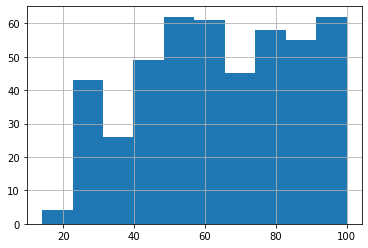

In [29]:
df_merged.PcntComplete.hist()

In [30]:
# #df_merged.drop(columns = ['Major_y', 'Minor_y', 'Major', 'Minor', 'PropertyType',
#                           'PrincipalUse', 'PropertyClass','PresentUse', 'WfntBank',
#                           'WfntPoorQuality', 'TidelandShoreland', 'Contamination',
#                           'PcntComplete'],inplace = True)
# #df_merged = df_merged.rename(columns = {'Major_x': 'Major', 'Minor_x': 'Minor'})

# #df_merged.columns

### Store the cleaned and merged table in Data folder

In [31]:
#pd.DataFrame.to_csv(df_merged, '../../data/processed/merged.csv', sep=',', na_rep=' ', index=False)